In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import xgboost
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/TANVI/Desktop/Python Projects/diabetes.csv")

In [3]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# 7 numerical variables and 1 categorical variable

### Missing Values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# missing values are actually labelled as 0, measures like bmi, bp and so on can't be zero

In [9]:
df_copy= df.copy(deep=True)

In [10]:
df_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","Age"]]= df_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","Age"]].replace(0,np.NaN)

In [11]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Duplicate Values

In [12]:
df[df.duplicated()].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


# Initial Exploratory Data Analysis 

In [13]:
# Numerical Data

In [14]:
# Pregnancies

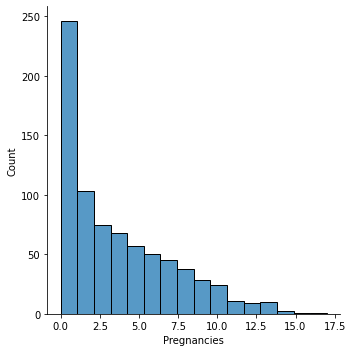

In [15]:
plot = sns.displot(data = df,x="Pregnancies")

Text(0.5, 1.0, 'Boxplot of Pregnancies')

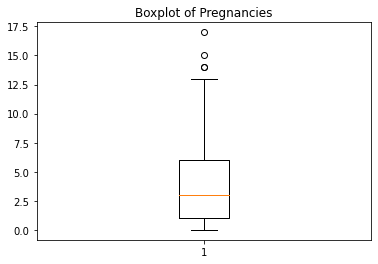

In [16]:
fig = plt.figure()
plt.boxplot(df["Pregnancies"])
plt.title('Boxplot of Pregnancies')

In [17]:
# Glucose

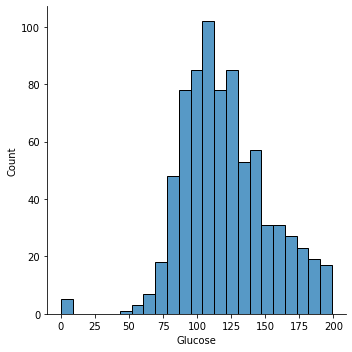

In [18]:
plot = sns.displot(data = df,x="Glucose")

Text(0.5, 1.0, 'Boxplot of Glucose')

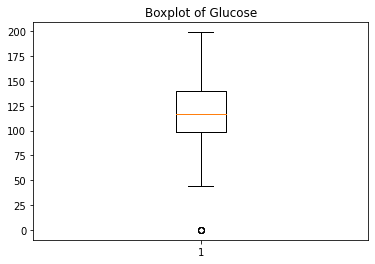

In [19]:
fig = plt.figure()
plt.boxplot(df["Glucose"])
plt.title('Boxplot of Glucose')

In [20]:
# Blood Pressure

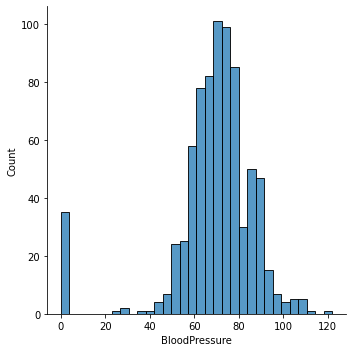

In [21]:
sns.displot(data= df, x ="BloodPressure")

Text(0.5, 1.0, 'Boxplot of BloodPressure')

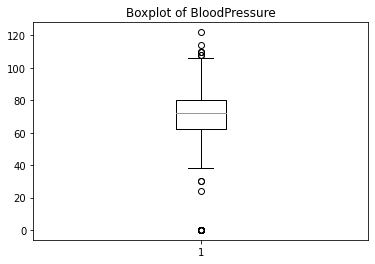

In [22]:
fig = plt.figure()
plt.boxplot(df["BloodPressure"])
plt.title('Boxplot of BloodPressure')

In [23]:
# SkinThickness

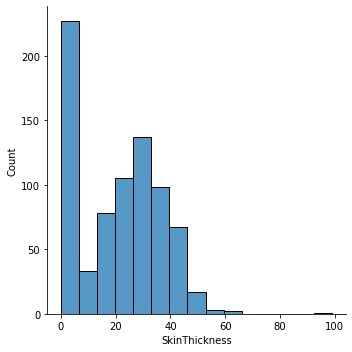

In [24]:
sns.displot(data= df, x ="SkinThickness")

Text(0.5, 1.0, 'Boxplot of SkinThickness')

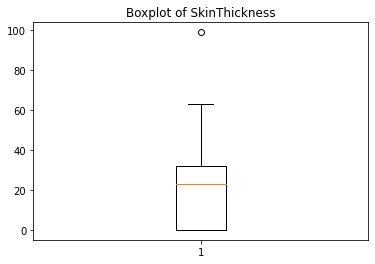

In [25]:
fig = plt.figure()
plt.boxplot(df["SkinThickness"])
plt.title('Boxplot of SkinThickness')

In [26]:
# Insulin

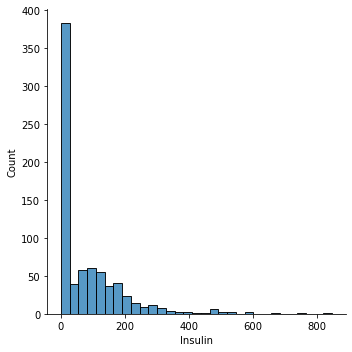

In [27]:
sns.displot(data= df, x ="Insulin")

Text(0.5, 1.0, 'Boxplot of Insulin')

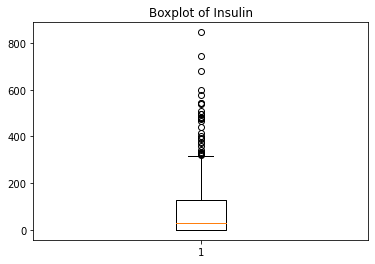

In [28]:
fig = plt.figure()
plt.boxplot(df["Insulin"])
plt.title('Boxplot of Insulin')

In [29]:
# BMI

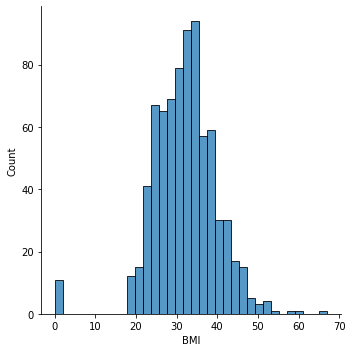

In [30]:
sns.displot(data= df, x ="BMI")

Text(0.5, 1.0, 'Boxplot of BMI')

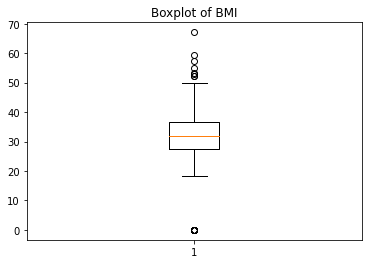

In [31]:
fig = plt.figure()
plt.boxplot(df["BMI"])
plt.title('Boxplot of BMI')

In [32]:
# DiabetesPedigreeFunction

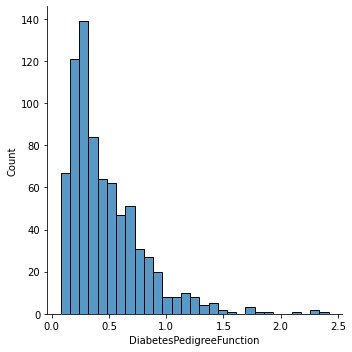

In [33]:
sns.displot(data= df, x ="DiabetesPedigreeFunction")

Text(0.5, 1.0, 'Boxplot of DiabetesPedigreeFunction')

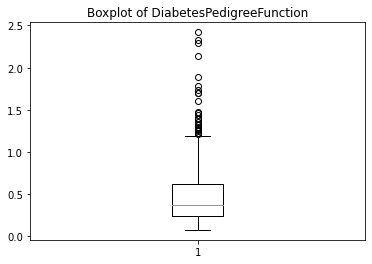

In [34]:
fig = plt.figure()
plt.boxplot(df["DiabetesPedigreeFunction"])
plt.title('Boxplot of DiabetesPedigreeFunction')

In [35]:
# Age

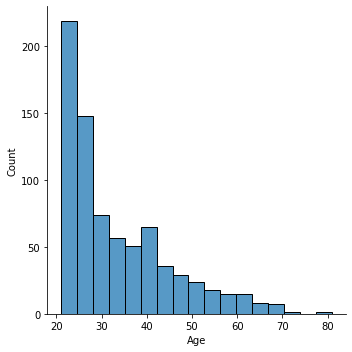

In [36]:
sns.displot(data= df, x ="Age")

Text(0.5, 1.0, 'Boxplot of Age')

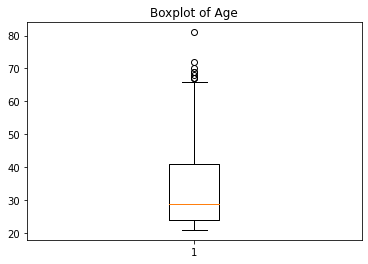

In [37]:
fig = plt.figure()
plt.boxplot(df["Age"])
plt.title('Boxplot of Age')

# Data Cleaning

In [38]:
# 1: Bad labelling of data : dealt 
# 2: Null Values - imputation
# 3: Duplicate values - none present
# 4: Outliers

## Null Value Imputation

In [39]:
df_copy["Glucose"].fillna(df_copy["Glucose"].mean(),inplace=True)
df_copy["BloodPressure"].fillna(df_copy["BloodPressure"].mean(),inplace=True)
df_copy["SkinThickness"].fillna(df_copy["SkinThickness"].mean(),inplace=True)
df_copy["Insulin"].fillna(df_copy["Insulin"].mean(),inplace=True)
df_copy["BMI"].fillna(df_copy["BMI"].mean(),inplace=True)

# EDA - after imputation

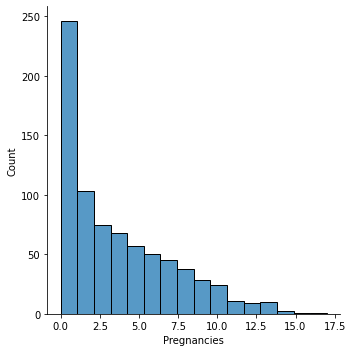

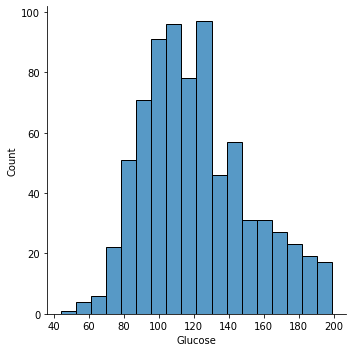

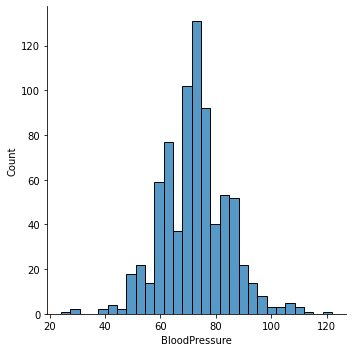

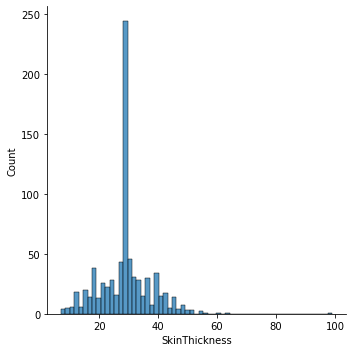

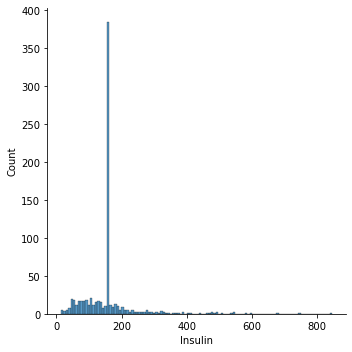

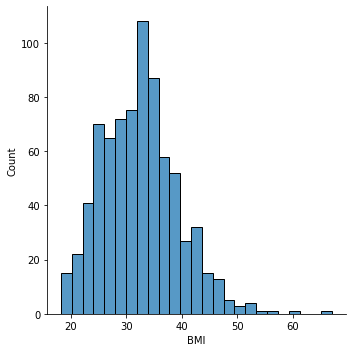

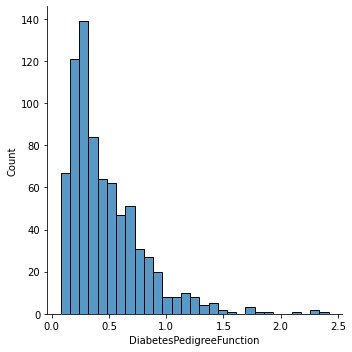

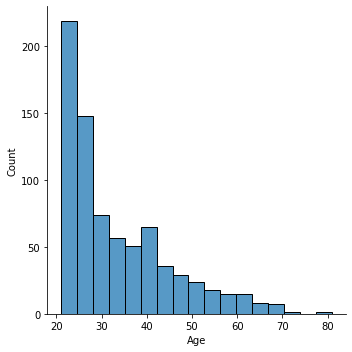

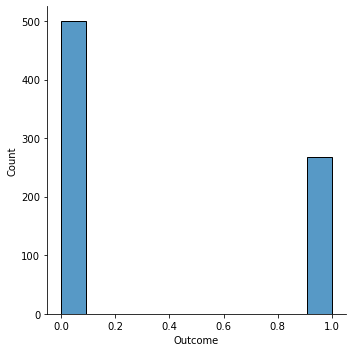

In [40]:
for col in df_copy.columns:
    sns.displot(data=df_copy,x=col)

Text(0.5, 1.0, 'Boxplot of Pregnancies')

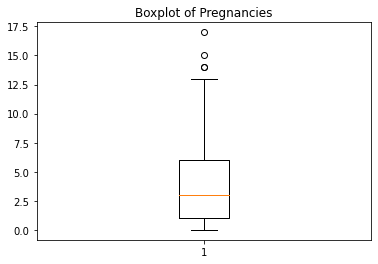

In [41]:
fig = plt.figure()
plt.boxplot(df_copy["Pregnancies"])
plt.title('Boxplot of Pregnancies')

Text(0.5, 1.0, 'Boxplot of Glucose')

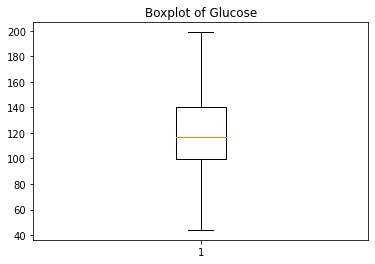

In [42]:
fig = plt.figure()
plt.boxplot(df_copy["Glucose"])
plt.title('Boxplot of Glucose')

Text(0.5, 1.0, 'Boxplot of BloodPressure')

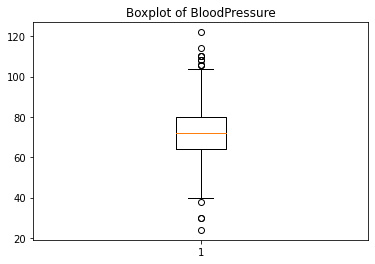

In [43]:
fig = plt.figure()
plt.boxplot(df_copy["BloodPressure"])
plt.title('Boxplot of BloodPressure')

Text(0.5, 1.0, 'Boxplot of SkinThickness')

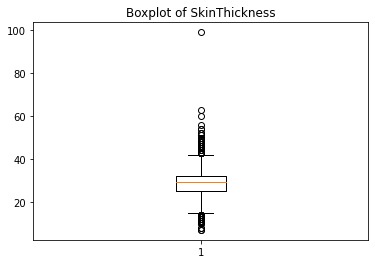

In [44]:
fig = plt.figure()
plt.boxplot(df_copy["SkinThickness"])
plt.title('Boxplot of SkinThickness')

Text(0.5, 1.0, 'Boxplot of Insulin')

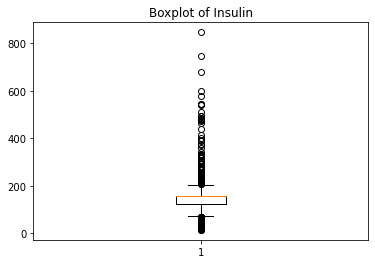

In [45]:
fig = plt.figure()
plt.boxplot(df_copy["Insulin"])
plt.title('Boxplot of Insulin')

Text(0.5, 1.0, 'Boxplot of BMI')

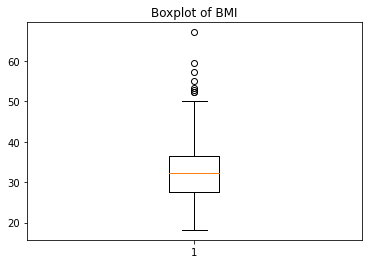

In [46]:
fig = plt.figure()
plt.boxplot(df_copy["BMI"])
plt.title('Boxplot of BMI')

Text(0.5, 1.0, 'Boxplot of DiabetesPedigreeFunction')

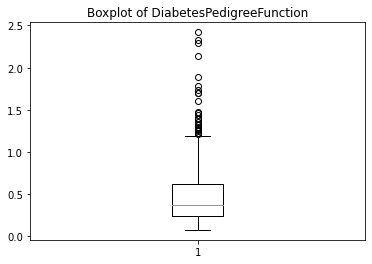

In [47]:
fig = plt.figure()
plt.boxplot(df_copy["DiabetesPedigreeFunction"])
plt.title('Boxplot of DiabetesPedigreeFunction')

Text(0.5, 1.0, 'Boxplot of Age')

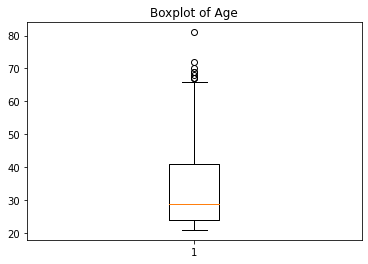

In [48]:
fig = plt.figure()
plt.boxplot(df_copy["Age"])
plt.title('Boxplot of Age')

## Balanced or Imbalanced?

In [49]:
# 1 : diabetic
# 0 : non diabetic

In [50]:
df_copy.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

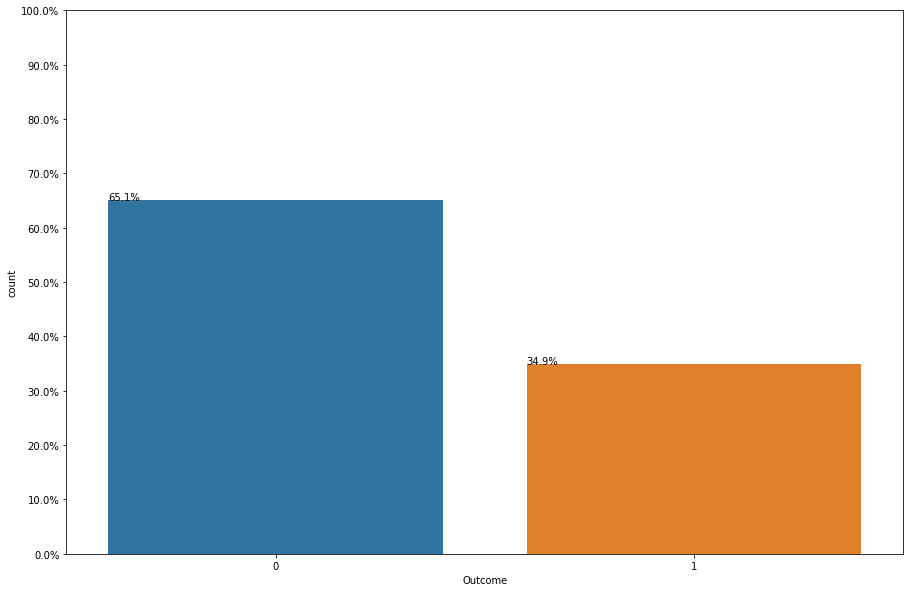

In [51]:
plt.figure(figsize=(15,10))
plot = sns.countplot(data=df_copy,x="Outcome")
total = len(df_copy["Outcome"])
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total),(p.get_x(),p.get_height()))
plot.yaxis.set_ticks(np.linspace(0,total,11))
plot.set_yticklabels(map('{:.1f}%'.format,100*plot.yaxis.get_majorticklocs()/total))
plt.show()

In [52]:
# 65.1 vs 34.9 , therefore data is imbalanced. Non diabetic patients are doublt the diabetic patients

# Feature Engineering

In [53]:
# Feature Selection

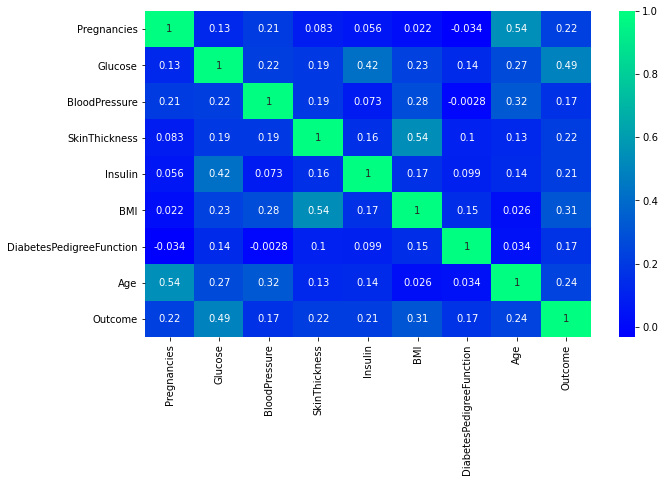

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df_copy.corr(),annot=True,cmap="winter")
plt.show()

In [55]:
# Scaling the Data

In [56]:
sc_X=StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis=1),),columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [57]:
y = df_copy.Outcome

In [58]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Train- Test Split

#### Will stratify the samples : each response class should be represented with equal proportions in each portions

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state = 2 )

In [60]:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (537, 8)
Shape of testing feature: (231, 8)
Shape of training label: (537,)
Shape of training label: (231,)


# Model Building

In [61]:
# KNN
# Decision Tree
# Support Vector Classifier
# Logistic Regression
# gaussian Naive Bayes
# Random Forest
# XGBoost

In [62]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,  'cm': cm}

#### 1. KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [64]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.7402597402597403
Precision: 0.647887323943662
Recall: 0.5679012345679012
F1 Score: 0.6052631578947368
Cohens Kappa Score: 0.41296060991105465
Confusion Matrix:
 [[125  25]
 [ 35  46]]


#### 2. Decision Tree

In [65]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [66]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.70995670995671
Precision: 0.5897435897435898
Recall: 0.5679012345679012
F1 Score: 0.5786163522012578
Cohens Kappa Score: 0.3576142448013946
Confusion Matrix:
 [[118  32]
 [ 35  46]]


#### 3. Support Vector Machine (SVM)

In [67]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [68]:
# Evaluate Model
svc_eval = evaluate_model(svc_model, X_test, y_test)

# Print result
print('Accuracy:', svc_eval['acc'])
print('Precision:', svc_eval['prec'])
print('Recall:', svc_eval['rec'])
print('F1 Score:', svc_eval['f1'])
print('Cohens Kappa Score:', svc_eval['kappa'])
print('Confusion Matrix:\n', svc_eval['cm'])

Accuracy: 0.7705627705627706
Precision: 0.7592592592592593
Recall: 0.5061728395061729
F1 Score: 0.6074074074074075
Cohens Kappa Score: 0.4543388153496457
Confusion Matrix:
 [[137  13]
 [ 40  41]]


#### 4. Logistic Regression 

In [69]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [70]:
# Evaluate Model
logreg_eval = evaluate_model(logisticRegr, X_test, y_test)

# Print result
print('Accuracy:', logreg_eval['acc'])
print('Precision:', logreg_eval['prec'])
print('Recall:', logreg_eval['rec'])
print('F1 Score:', logreg_eval['f1'])
print('Cohens Kappa Score:', logreg_eval['kappa'])
print('Confusion Matrix:\n', logreg_eval['cm'])

Accuracy: 0.7619047619047619
Precision: 0.75
Recall: 0.48148148148148145
F1 Score: 0.5864661654135339
Cohens Kappa Score: 0.43024350867751915
Confusion Matrix:
 [[137  13]
 [ 42  39]]


#### 5. Gaussian Naive Bayes'

In [71]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [72]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.7575757575757576
Precision: 0.6984126984126984
Recall: 0.5432098765432098
F1 Score: 0.611111111111111
Cohens Kappa Score: 0.4389799635701275
Confusion Matrix:
 [[131  19]
 [ 37  44]]


#### 6. Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [74]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.7489177489177489
Precision: 0.6716417910447762
Recall: 0.5555555555555556
F1 Score: 0.608108108108108
Cohens Kappa Score: 0.4258164052455644
Confusion Matrix:
 [[128  22]
 [ 36  45]]


#### 7. XgBoost 

In [75]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [76]:
# Evaluate Model
xgb_eval = evaluate_model(xgb_model, X_test, y_test)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.7792207792207793
Precision: 0.7027027027027027
Recall: 0.6419753086419753
F1 Score: 0.6709677419354838
Cohens Kappa Score: 0.5053533190578159
Confusion Matrix:
 [[128  22]
 [ 29  52]]


In [77]:
accuracy_dict ={
    "KNN":knn_eval['acc'],
    "Decision Tree":dtc_eval['acc'],
    "SVC":svc_eval['acc'],
    "Logistic":logreg_eval['acc'],
    "Gaussian Naive Bayes":nb_eval['acc'],
    "Random Forest":rf_eval['acc'],
    "XGB":xgb_eval['acc']
}

In [78]:
accuracy_dict

{'KNN': 0.7402597402597403,
 'Decision Tree': 0.70995670995671,
 'SVC': 0.7705627705627706,
 'Logistic': 0.7619047619047619,
 'Gaussian Naive Bayes': 0.7575757575757576,
 'Random Forest': 0.7489177489177489,
 'XGB': 0.7792207792207793}

### XGB is the best model with an accuracy of 78%

# Model Evaluation

### Method for directly getting accuracy table, without running each individually

In [79]:
# 1. using train/test split

In [80]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

In [81]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append( metrics.accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.740260
1  SVC  0.770563
2   LR  0.761905
3   DT  0.718615
4  GNB  0.757576
5   RF  0.757576
6  XGB  0.779221


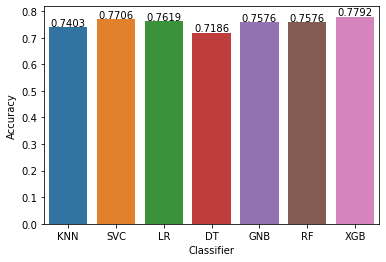

In [87]:
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

# Feature Importance

In [88]:
xgb_model.feature_importances_

array([0.09058984, 0.26510853, 0.08447412, 0.09217186, 0.14487855,
       0.127413  , 0.08529387, 0.11007021], dtype=float32)

In [90]:
# Visualising it

<AxesSubplot:>

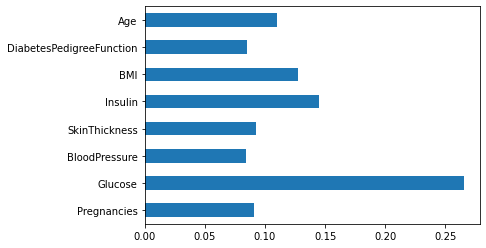

In [89]:
(pd.Series(xgb_model.feature_importances_, index=X.columns).plot(kind='barh'))

In [91]:
# Glucose is the most important feature

# Saving Model

In [92]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(xgb_model)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [95]:
# taking any random set of features from both the head and tail of the data to test that if our model is good enough to give the right prediction.

In [93]:
df_copy.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.548223,26.6,0.351,31,0


In [94]:
df_copy.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1
767,1,93.0,70.0,31.00000,155.548223,30.4,0.315,23,0


In [99]:
input_data = (0,137,40,35,168,43.1,2.228,33)
# convert input data to numpy array for easier processing 

input_data_as_numpy_array = np.asarray(input_data)

# ideally the model will expect the data points = shape of the dataframe ( in our case it is 768)

# we only have to provide one data point for our prediction 

# so we take one row value except the label/output/target variable and reshape it 
# reshape the array 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# scaling the data - do the standardization for input data

std_data = sc_X.transform(input_data_reshaped)
print(std_data)

prediction = xgb_model.predict(std_data)
print(prediction)

if prediction[0]== 0: 
    print("The Person is not diabetic")
else:
    print("The Person is Diabetic")

[[-1.14185152  0.50345782 -2.68066914  0.66550212  0.14655056  1.54897999
   5.30370198 -0.0204964 ]]
[1]
The Person is Diabetic
